Pen trucking logistics want to build a linear regression model to forecast the time until the first engine overhaul based in the 4 explantory variables/factors; annual miles drive, average load weight, average driving speed, oil change intervals. the data is a sample of 25 trucks and save under filename engine_overhaul.txt file.

In [17]:
import streamlit as st
from openai import OpenAI

st.set_page_config(page_title="Supply Chain LLM Project Generator", layout="centered")

# Title
st.title("🚚 Supply Chain LLM Project Generator")
st.write("Generate predictive maintenance and supply chain Python projects using an LLM trained on operational analytics style.")

st.subheader("🔐 Enter Your OpenAI API Key")
api_key = st.text_input(
    "OpenAI API Key",
    placeholder="sk-...",
    type="password"
)

if not api_key:
    st.warning("Please enter your OpenAI API key to continue.")
    st.stop()

# Initialize OpenAI client AFTER key is provided
client = OpenAI(api_key=api_key)

2025-12-08 12:48:44.959 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 12:48:44.966 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 12:48:45.576 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-08 12:48:45.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 12:48:45.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 12:48:45.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-08 12:48:45.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [6]:





import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/sample_data/Engine_Overhaul.txt', sep='\t')

df.head()

,Time,Miles,Weight,Speed,Oil
0,7.9,42.8,19,46,15
1,0.9,98.5,25,46,29
2,8.5,43.4,21,64,14
3,1.3,110.7,27,60,26
4,1.4,102.3,28,51,17


Regression Equation
Time = 13.434  -0.090*Miles +  -0.073*Weight + + 0.005*Speed +  -0.030*Oil

R-squared: 0.9099


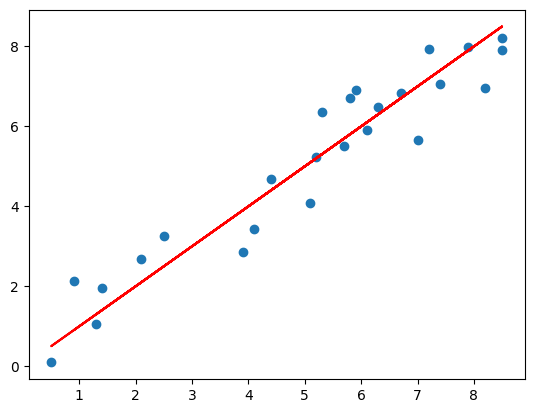


Coefficients:
  variable  coefficient
0    Miles    -0.089564
1   Weight    -0.073179
2    Speed     0.004753
3      Oil    -0.029686

Predicted Times for New Data:
[8.07482061 1.97175137 8.25179724 0.92994075 1.85744118]


In [15]:
from sklearn.linear_model import LinearRegression
y = df['Time'] # the dependent variable / predict the results

x = df[['Miles', 'Weight', 'Speed','Oil']] # the independent variables used for linear regression

model = LinearRegression()
model.fit(x,y)

#The function of a regression model is to estimate the relationship between
#a dependent variable (Y) and one or more independent variables (X)
#for the purposes of understanding the relationship and making predictions or forecasts


# Co efficienies
#A coefficient of zero would imply no relationship between a specific
#independent variable and the dependent variable. Therefore,
#their non-zero values and signs are essential for interpreting the model's findings.

co_efficiencies = pd.DataFrame({'variable': x.columns, 'coefficient': model.coef_})

intercept = model.intercept_  # to prevent system bias by providing baseline for dependent variable

print('Regression Equation')
print(f"Time = {intercept:.3f} {'+' if model.coef_[0]>0 else ''} {model.coef_[0]:.3f}*Miles + {'+' if model.coef_[1]>0 else ''} {model.coef_[1]:.3f}*Weight + {'+' if model.coef_[2]>0 else ''} {model.coef_[2]:.3f}*Speed + {'+' if model.coef_[3]>0 else ''} {model.coef_[3]:.3f}*Oil")



#predict
y_pred = model.predict(x)

# Model performance usubg R square. closer to 1 is perfect score accuracy
r2 = model.score(x, y)
print("\nR-squared:", round(r2, 4))


#The R-squared value then helps to evaluate how well this fitted model explains the observed
#variation in the data. Plotting the data with a line chart (specifically, a scatter plot with
#a fitted line) provides a visual representation of this relationship and the model's performance

# Plot actual vs predicted
plt.scatter(x=y, y=y_pred)
plt.plot(y,y, color='red')
plt.show()


# Display coefficients
print("\nCoefficients:")
print(co_efficiencies)

#Interpreting the Coefficients
#Miles (-0.089564): For every one-unit increase in Miles driven (likely in 1,000s of miles),
#the expected time until the first engine overhaul decreases by approximately 0.0896 units of time.
#This suggests that driving more miles causes the engine to wear out faster, requiring an overhaul sooner.

#Weight (-0.073179): For every one-unit increase in Weight (likely average load weight in tons), the expected time until the first engine overhaul decreases by approximately 0.0732 units of time.
#This indicates that carrying heavier loads also contributes to faster engine wear and a sooner overhaul.

#Speed (0.004753): For every one-unit increase in Speed (likely average driving speed in mph),
#the expected time until the first engine overhaul increases by approximately 0.0048 units of time.
#This positive coefficient might seem counterintuitive but suggests a complex relationship where perhaps
#consistent highway speeds (higher average speed) are less taxing than stop-and-go city driving,
#or it could be an artifact of the specific data used for the model.

#Oil (-0.029686): For every one-unit increase in Oil (likely oil change interval in 1,000s of miles),
#the expected time until the first engine overhaul decreases by approximately 0.0297 units of time.
#This makes sense as increasing the longer intervals between oil changes (less frequent maintenance) lead to more engine wear and a sooner overhaul

# Predict for new data
new_data = pd.DataFrame({
    'Miles': [45, 100, 40, 110, 100],
    'Weight': [15, 25, 20, 30, 35],
    'Speed': [45, 45, 65, 60, 50],
    'Oil': [15, 30, 15, 25, 10]
})

predicted_times = model.predict(new_data)
print("\nPredicted Times for New Data:")
print(predicted_times)


